In [19]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as  pdr
from numpy import linalg as la


In [35]:
# 1 Novo modo de pegar os dados das acoes

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
lista_acoes = ['VALE3.SA', 'MGLU3.SA', 'PETR4.SA', 'WEGE3.SA']
from datetime import datetime
startdate = datetime(2022,12,1)
enddate = datetime(2023,12,15)
precos = pdr.get_data_yahoo(lista_acoes, start=startdate, end=enddate)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [38]:
# 2 Pegando a Covariancia

retornos = precos.pct_change().dropna()
media_retornos = retornos.mean()
matriz_covariancia = retornos.cov()
pesos_carteira = np.array([2.5, 2.5, 2.5, 2.5])
numero_acoes = len(lista_acoes)


In [39]:
# 3 Premissas de Monte Carlos

numero_simulacoes = 100000
dias_projetados = 252*3
capital_inicial = 40000

In [40]:
# 4 Gerando Retorno Medio

retorno_medio = retornos.mean(axis= 0).to_numpy()
matriz_retorno_medio = retorno_medio*np.ones(shape = (dias_projetados, numero_acoes))

In [41]:
# 5 Gerando L

L = la.cholesky(matriz_covariancia)

In [42]:
# 6 Gerando Simulações

retornos_carteira = np.zeros([dias_projetados, numero_simulacoes]) # cada coluna é uma simulação
montante_final = np.zeros(numero_simulacoes)

for s in range(numero_simulacoes):
    Rpdf = np.random.normal(size=(dias_projetados, numero_acoes))
    retornos_sinteticos = matriz_retorno_medio + np.inner(Rpdf, L) # unica coisa ramdon é o Rpdf
    retornos_carteira[:, s] = np.cumprod(np.inner(pesos_carteira, retornos_sinteticos) + 1)*capital_inicial
    montante_final[s] = retornos_carteira[-1, s]

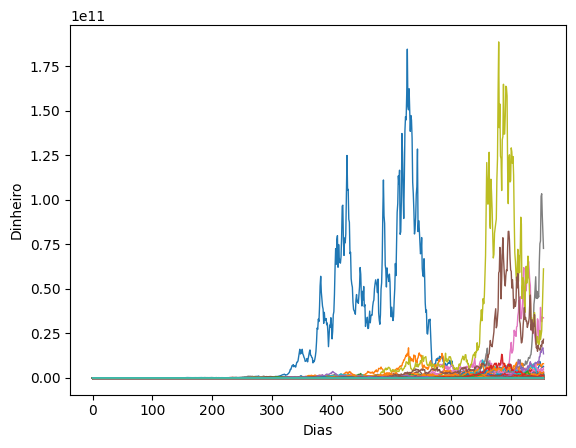

In [43]:
# 7 Gerando o Grafico

plt.plot(retornos_carteira, linewidth=1)
plt.ylabel('Dinheiro')
plt.xlabel('Dias')
plt.show()